# Investigating Movie Rating Biases: A Case Study of Fandango

In this study, we explore the presence of biases and potential dishonesty in online movie rating aggregators, with a specific focus on Fandango. Inspired by data journalist [Walt Hickey's in-depth analysis](https://fivethirtyeight.com/features/fandango-movies-ratings/) published in 2015, our aim is to scrutinize Fandango's rating data for any persistent patterns indicative of bias.

Hickey's investigation uncovered significant irregularities within Fandango's rating system, including:

* Consistent rounding up of ratings to the nearest half-star, without any instances of rounding down.
* An overwhelming prevalence of high ratings; nearly no movies received ratings below three stars (98% of the time), with 75% of ratings falling within the four-star range or higher.

**Why should we care?**

Understanding the integrity of online movie ratings is crucial for several reasons:

- The film industry is a **significant economic force**, generating billions annually at the U.S. box office. Consequently, the influence of online ratings aggregators on **consumer decisions** is substantial.
- Fandango, as a prominent player in the movie ticketing market, has a **vested interest** in shaping consumer perceptions through its ratings. Their influence extends to direct ticket sales.
- Regulatory bodies such as the **Federal Trade Commission** are vigilant in safeguarding consumers against deceptive and anti-competitive practices. Monitoring the online rating ecosystem for transparency and accountability is essential in ensuring **fair and transparent marketplace practices.**

Building upon Hickey's findings, our project seeks to assess whether Fandango has implemented measures to address these biases as previously indicated, or if the observed patterns continue to persist within their rating system. We aim to contribute to a more transparent and accountable rating ecosystem, empowering consumers and regulatory bodies to make informed decisions.

## Finding Suitable Datasets

We've chosen to utilize two distinct datasets for our investigation. This approach allows us to compare and analyze Fandango's ratings both before and after Walt Hickey's influential 2015 analysis:

1. **The 2015 Dataset**: We'll begin by examining the dataset originally collected by Walt Hickey as part of his comprehensive analysis. The dataset, [fandango_score_comparison.csv](https://github.com/fivethirtyeight/data/blob/master/fandango/fandango_score_comparison.csv), provides a snapshot of Fandango's rating practices before potential adjustments made in response to Hickey's findings.

2. **The 2016-2017 Dataset**: In addition to Hickey's dataset, we'll also incorporate a dataset spanning the years 2016 to 2017. This dataset, [movie_ratings_16_17.csv](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/movie_ratings_16_17.csv), provides a more recent perspective on Fandango's ratings landscape, allowing us to assess whether any changes or adjustments have occurred following Hickey's analysis.


### Load Essential Columns During Data Import
After reviewing the documentation for both the [2015](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) and [2016-2017](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) datasets, we've identified extraneous columns that won't contribute to our analysis. To streamline the dataset and ensure that only necessary information is loaded into memory, we'll retain the columns vital to our investigation.

In [35]:
# Config option to print all interactive output in a cell
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [44]:
import pandas as pd

# Columns to import from first dataset
columns = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']

# Import dataset prior to Hickey's analysis
movies_prior = pd.read_csv('./dataset/fandango_score_comparison.csv', usecols=columns)

movies_prior.head(3)
movies_prior.tail(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0


In [45]:
# Columns to import for second dataset
columns = ['movie', 'year', 'fandango']

# Import dataset after Hickey's analysis
movies_after = pd.read_csv('./dataset/movie_ratings_16_17.csv', usecols=columns)

movies_after.head(3)
movies_after.tail(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


,movie,year,fandango
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5
213,Zootopia,2016,4.5


Now, we'll get a high-level overview of both datasets, providing a basic understanding of the structure and content of each dataset.

In [55]:
'---------- 2015 Dataset ----------->'
movies_prior.info()

'<-------- 2016-2017 Dataset ------->'
movies_after.info()

'---------- 2015 Dataset ----------->'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


'<-------- 2016-2017 Dataset ------->'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     214 non-null    object 
 1   year      214 non-null    int64  
 2   fandango  214 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


**Initial Observations:**

* The first dataset comprises 146 entries (movies) spread across 5 columns, while the second dataset consists of 214 entries (movies) and 3 columns.
* Both datasets exhibit completeness, with no missing values observed (non-null counts align with the total number of entries).
* Data types are consistent with the documentation and are optimal for our analysis needs.
* There is a disparity in the naming conventions of the column headers between the two datasets. Standardizing them would maintain consistency and clarity throughout the report.
* The first dataset has the year in paenthesis in the movie name. We'll want to clean this up by isolating the movie name and separating the year into a different column.

### Adjust Initial Goal to Minimize Sampling Error

**Methodology:**
1. **Data Collection:**
* fandango_score_comparison.csv: Contains data on every film with **at least 30 fan reviews** on Fandango, collected in **2015**.
* movie_ratings_16_17.csv: Consists of movie ratings data for **214 popular movies** released in **2016** and **2017**.

2. **Population of Interest:** Fandango's entire movie dataset.

3. **Sampling Approach:** Recognize that both datasets are not obtained through random sampling and may not be representative of the population of interest.

4. **Adjusted Analysis:** Instead of investigating changes in Fandango's rating system over time, we will compare Fandango's ratings for popular movies **(30 reviews and up)** in **2015** and **2016**. This approach allows us to explore potential differences in ratings between the two time periods.

5. **Adjusted Population of Interest:** All Fandango's ratings for popular movies released in 2015 and 2016.

Given the limitations of the available datasets and the non-random sampling processes involved, we have refined our project goal to focus on comparing Fandango's ratings for popular movies in 2015 and 2016. This adjustment allows us to leverage the available data effectively while minimizing the risk of drawing inaccurate conclusions due to sampling bias.

## Clean and Prep the Data for Analysis

1. Clean up the column names to standardize two datasets. 
2. We'll check if both samples contain enough popular movies to be representative of the population.
2. Isolate sample points that belong to our population of interest only i.e. 2015 and 2016 movies.
3. 1st dataset Avengers: Age of Ultron (2015)	

### 1. Standarize Column Names for Both Datasets

We'll standarize the column names to lowercase and match names for similar columns.

In [58]:
# Change first dataset's column header to lowercase
movies_prior.columns = movies_prior.columns.str.lower()

# Map the column names to the desired names
movies_prior.rename(columns={'fandango_ratingvalue': 'fandango_rating_value', 'film': 'movie'}, inplace=True)

# Display updated column header
movies_prior.columns

Index(['movie', 'fandango_stars', 'fandango_rating_value', 'fandango_votes',
       'fandango_difference'],
      dtype='object')

### 2. Determine Population Representativity of Datasets** 

Defined as:
1. Check the rating is 30 and up.
2. Movies released in 2015 and 2016 only.

**30 and up**

Next, we'll check if both datasets have enough popular movies to be representative of the population of interest i.e. 30 ratings or up.
We'll begin with the first dataset.

In [60]:
# Number of movies with less than 30 fan reviews
movies_prior.loc[movies_prior['fandango_votes'] < 30, 'movie'].count()

0

In [59]:
# Get the min and max reviews in the first dataset
min_reviews = movies_prior['fandango_votes'].min()
max_reviews = movies_prior['fandango_votes'].max()

'Range: [{} - {}]'.format(min_reviews, max_reviews)

'Range: [35 - 34846]'

None of the movies in the first dataset (prior to Hickey's analysis) have less than 30 reviews; they are between the range 35 and 34,846. This matches the expectation of *popular* movies as defined in our population of interest.

The documentation for the second dataset doesn't clearly reveal their criteria for *popular* movies. This raises represntativity issue. We can try to merge the two datasets and see if they have movies in common that could give further insights about the second dataset's movies.

In [8]:
# Merge the two dataset - keep all movies from 2nd dataset and common movies from 1st dataset
merged_data = pd.merge(left=movies_after, right=movies_prior, how='inner', on='movie')

merged_data['fandango_votes'].value_counts(dropna=False)

Series([], Name: count, dtype: int64)

There are no movies in common between the two dataset. We'll have to come up with a different approach.

**Extract Year from movie column**

We want to clean the first dataset's movie column and extract the year out of it, which might be useful later on to double-check the year these movies were released to check representativity.

In [9]:
# Define regex pattern for year
year_pattern = r"(?P<year>[1-2][0-9]{3})"

# Extract the year and store it in a column
movies_prior['year'] = movies_prior['movie'].str.extract(year_pattern)

movies_prior['movie'] = movies_prior['movie'].str.split('(').str[0]

movies_prior

,movie,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2,3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
141,Mr. Holmes,4.0,4.0,1348,0.0,2015
142,'71,3.5,3.5,192,0.0,2015
143,"Two Days, One Night",3.5,3.5,118,0.0,2014
144,Gett: The Trial of Viviane Amsalem,3.5,3.5,59,0.0,2015


### 3. Isolate Movies Released in 2015 and 2016 from the Dataset
Now that the movie name and the year are in separate column, we can find how many movies are not 2015/2016. We'll begin with the frequency distribution of the first dataset and isolate the data for movies release in 2015.

In [10]:
movies_prior['year'].value_counts()

year
2015    129
2014     17
Name: count, dtype: int64

In [11]:
movies_2015 = movies_prior[movies_prior['year'] == '2015']

movies_2015['year'].value_counts()

year
2015    129
Name: count, dtype: int64

We'll do the same for the 2nd dataset and isolate the data for year 2016.

In [12]:
movies_after['year'].value_counts()

year
2016    191
2017     23
Name: count, dtype: int64

In [13]:
movies_2016 = movies_after[movies_after['year'] == 2016]

movies_2016['year'].value_counts()

year
2016    191
Name: count, dtype: int64

## Analysis: Comparing the Distribution Shapes for 2015 and 2016 Movies

We'll start by a high level comparision between the two dataset by plotting a kernel distribution plots. Again, the goal is to look at the ratings distribution to see how has fandango's rating distribution different in 2016 from 2015. 

c:\Users\shree\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='fandango_stars', ylabel='Density'>

<Axes: xlabel='fandango_stars', ylabel='Density'>

Text(0.5, 1.0, 'Rating Distribution in 2015 and 2016')

Text(0.5, 0, 'Rating')

(0.0, 5.0)

([<matplotlib.axis.XTick at 0x181055e12e0>,
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0')])

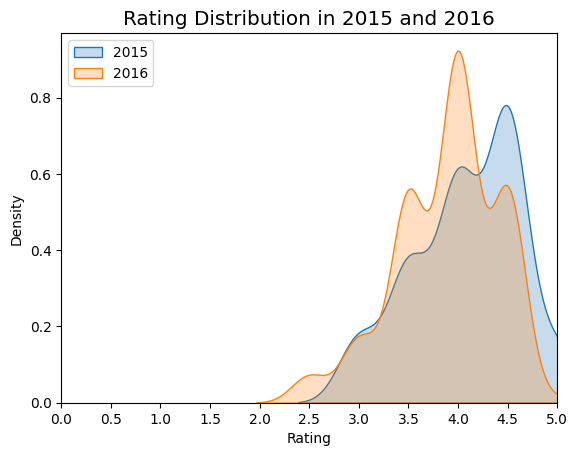

In [14]:
import seaborn as sns, matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

sns.kdeplot(data=movies_2015, x='fandango_stars', label='2015', fill=True)
sns.kdeplot(data=movies_2016, x='fandango', label='2016', fill=True)

plt.title('Rating Distribution in 2015 and 2016', size='x-large')
plt.xlabel('Rating')
plt.xlim(0, 5)
plt.xticks(arange(0.0, 5.1, .5))
plt.legend()
plt.show()


- Both are heavily left skewed with more higher ratings.
- 2016 looks more like a normal distribution.
- 2015 is slightly left skewed compared to 2016.
- 2016 is shifted slightly to the left, suggesting the difference in the ratings were lower compared to 2015

In [15]:
movies_2015['fandango_stars'].describe()

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: fandango_stars, dtype: float64

In [16]:
movies_2016['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

The 2016 data shows slightly more variations in 2.5 to 5.0 vs in 2015: 3.0 to 5.0.

25% of the time, the 2016 movies have between 4.0 and 4.25 vs 2015 is distributed between 4.0 to 4.5 Slight improvement from previous year is suggested.

As per Hicky's analysis, there were almost no ratings less than 3.0. Now in 2016, there is a slight improvement of 3.14% increase in 2.5 ratings. Still, a vast majority, roughly 66% is 4.0 or above.


### Using Relative Frequency for Comparing Distribution

Since the sample has different number of movies, it makes sense to use relative frequency rather than absolute when comparing their distribution.
As per Hicky's analysis, there were almost no ratings less than 3.0. Now in 2016, there is a slight improvement of 3.14% increase in 2.5 ratings. Still, a vast majority, roughly 66% is 4.0 or above.

In [17]:
movies_2016['fandango'].value_counts(normalize=True) * 100

fandango
4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: proportion, dtype: float64

Granular View

<Figure size 1500x700 with 0 Axes>

<Axes: >

array([<Axes: ylabel='count'>], dtype=object)

Text(0.5, 1.0, 'Percentage Distribution of 2015 movies')

Text(0, 0.5, '')

<Axes: >

array([<Axes: ylabel='count'>], dtype=object)

Text(0.5, 1.0, 'Percentage Distribution of 2016 movies')

Text(0, 0.5, '')

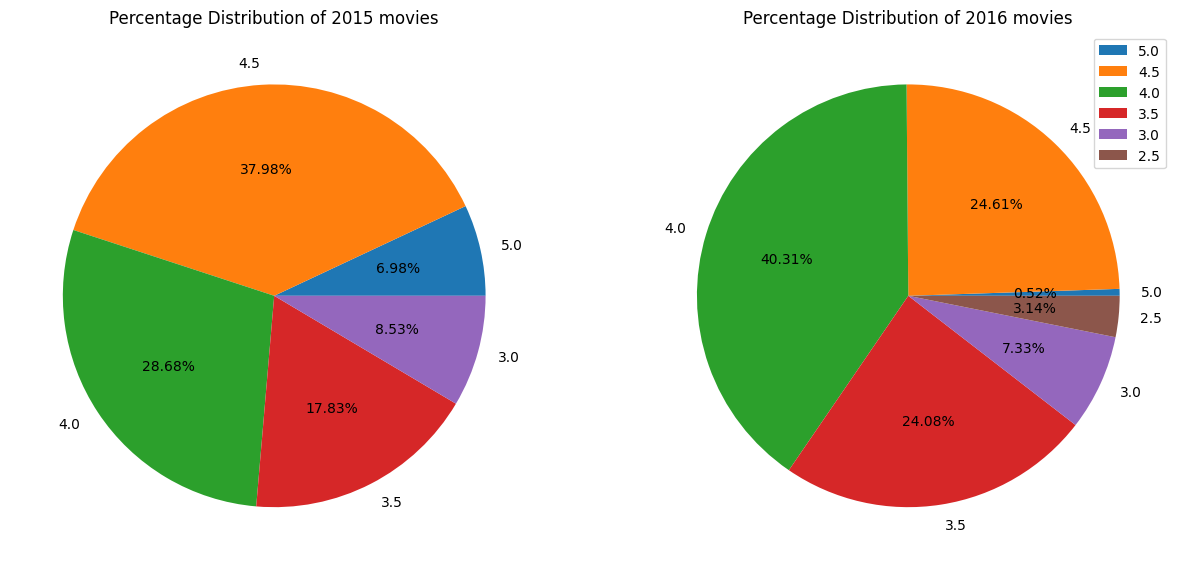

In [18]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
movies_2015['fandango_stars'].value_counts().sort_index(ascending=False).plot.pie(subplots=True, autopct='%.2f%%')

plt.title('Percentage Distribution of 2015 movies')
plt.ylabel('')

plt.subplot(1, 2, 2)
movies_2016['fandango'].value_counts().sort_index(ascending=False).plot.pie(subplots=True, autopct='%.2f%%')
plt.title('Percentage Distribution of 2016 movies')
plt.ylabel('')

plt.legend(loc='upper right')
plt.show()

- Less than 1% is 5.0 stars in 2016 vs almost 7% in 2015.
- Significant portion above 4.5 in 2015. In 2016 most bulk at 4.0, 4.5, and 3.5 respectively.

Can us other pie charts for comparision??

<Axes: xlabel='fandango_stars', ylabel='Density'>

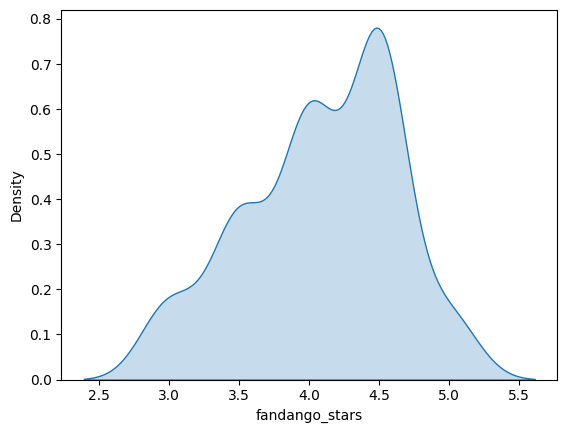

In [19]:
# Plot a relative frequency distribution
# sns.kdeplot(data=movies_2015, x='fandango_stars', label='2015', fill=True)
import numpy as np

total_movies = len(movies_2015)
proportions = movies_2015['fandango_stars'].value_counts(normalize=True).sort_index()

# Plot the KDE with proportions
sns.kdeplot(data=movies_2015, x='fandango_stars', label='2015', fill=True, weights=np.ones(total_movies) / total_movies)

### Determining the Direction of the Change

The direction is not as clear as the kernel distribution.

Comapre sumarry statsistic: mean, median, mode.


In [20]:
df = pd.DataFrame([],
                  index=('2015', '2016'),
                  columns=('mean', 'median', 'mode'))

# Print Mean, Median, Mode Summary Stats for any Series
def generate_stats(data, title):
    print(title + '\n----------------')

    data_mean = round(data.mean(), 1)
    data_median = round(data.median(), 1)
    data_mode = data.mode()[0]

    # Add to dataframe
    df.loc[title, ['mean', 'median', 'mode']] = [data_mean, data_median, data_mode]

    print('Mean: {} \nMedian: {} \nMode {}\n'.format(data_mean, data_median, data_mode))

df


,mean,median,mode
2015,NaN,NaN,NaN
2016,NaN,NaN,NaN


In [21]:
# Mean, median, mode of 2015 ratings
generate_stats(movies_2015['fandango_stars'], '2015')

# Mean, median, mode of 2016 ratings
generate_stats(movies_2016['fandango'], '2016')

df

2015
----------------
Mean: 4.1 
Median: 4.0 
Mode 4.5

2016
----------------
Mean: 3.9 
Median: 4.0 
Mode 4.0



,mean,median,mode
2015,4.1,4.0,4.5
2016,3.9,4.0,4.0


2015: 
* 50th percentile is 4.0 for both (50% <= the value)
* Most frequent 4.5
* Mean is 4.1 - meaning the higher ratings are pulling the mean to the right

2016:
* Most frequent is 4.0
* Mean is pulled to the left: equal weight before 3.9 and after

Direction of change: to the left slightly

<Axes: ylabel='mean'>

Text(0.5, 0, 'Rating')

<Axes: ylabel='median'>

Text(0.5, 0, 'Median')

<Axes: ylabel='mode'>

Text(0.5, 0, 'Mode')

Text(0.5, 1.0, '')

Text(0.5, 1.0, '')

Text(0.5, 1.0, '')

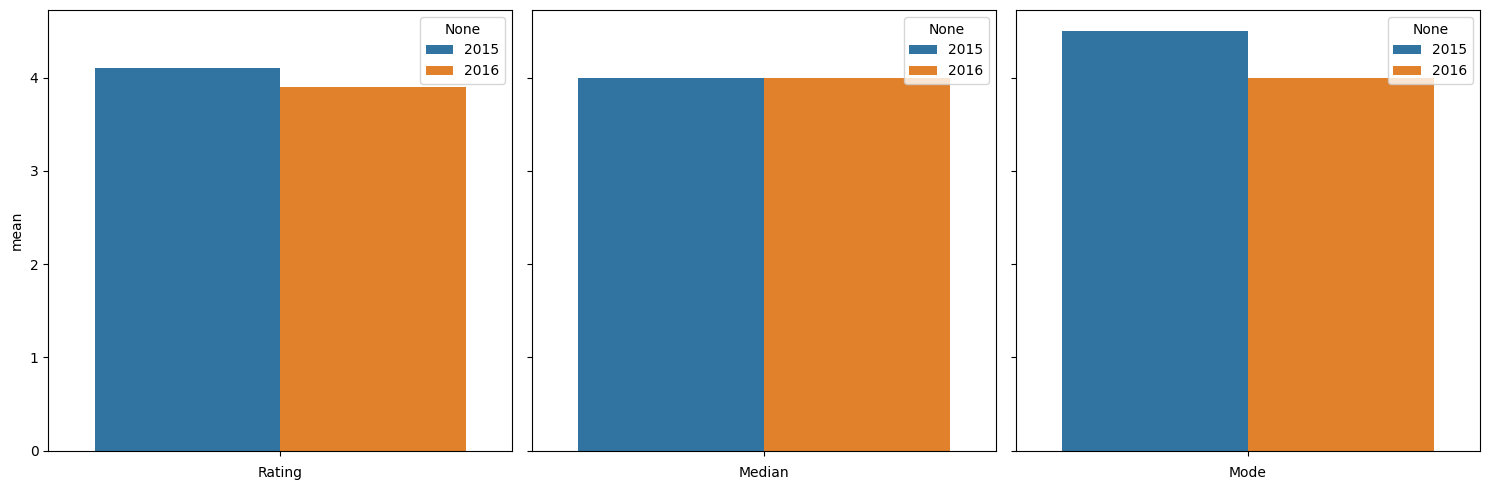

In [22]:
# Grouped bar plot to compare stats

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot mean
sns.barplot(data=df, y='mean', hue=df.index, ax=axes[0])
axes[0].set_xlabel('Rating')

# Plot median
sns.barplot(data=df, y='median', hue=df.index, ax=axes[1])
axes[1].set_xlabel('Median')

# Plot mode
sns.barplot(data=df, y='mode', hue=df.index, ax=axes[2])
axes[2].set_xlabel('Mode')

# Remove the redundant titles
for ax in axes:
    ax.set_title('')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Conclusion

There seem to be a slight difference in the Fandango's rating system in 2016 compared to 2015. On avaerage, more movies were rated lower. While the lowest rating in 2015 was 3.0, 2016 has ratings as low as 2.5. While Z% had a rating above 4.5 in 2015, the 2016 rating comprised of roughly % above 4.5, which is a significant change.

Overall, the project concludes that althiugh there isn't a significant change in Fandango's system, they have likely made corrections after Hickey's analysis.